## COMPUTER VISION AND SCENE ANALYSIS


## ASSIGNMENT 1

#### Name: Sonit Samal                                 


#### NetID: ss11354

## IMAGE INPUT 

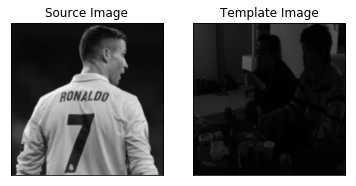

In [213]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import collections as c
from collections import Counter

#Reading the Image

#Source Image --- 
source = cv2.imread(r'C:\Users\Sonit Samal\Desktop\source.jpg',0)
#Template Image ---
template = cv2.imread(r'C:\Users\Sonit Samal\Desktop\chang.png',0)

f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(source, cmap = 'gray', interpolation = 'bicubic')
plt.title('Source Image')
plt.xticks([]),plt.yticks([])
f.add_subplot(1,2,2)
plt.imshow(template, cmap = 'gray', interpolation = 'bicubic')
plt.title('Template Image')
plt.xticks([]),plt.yticks([])
plt.show()

#Displaying Image using MatplotLib
def display_image(image_name):
    plt.imshow(image_name,cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]),plt.yticks([])
    plt.show()

#Function to print histogram    
def histogram(image_name):
    size = image_name.shape
    arr = np.array(image_name)
    #Converting the 2D image to 1D
    flat_arr = arr.ravel()
    flat_arr = [int(round(x)) for x in flat_arr]
    #Mapping Intensities
    counter = c.Counter(flat_arr)
    counter = sorted(counter.items())
    
    #print(counter, len(counter))
    
    x_pos = []
    for i in range(0,256):
        x_pos.append(i)
    
    y_key = []
    y_val = []
    for i in counter:
        y_key.append(i[0])
        y_val.append(i[1])
    
    final_y = [0]*256
    for i in range(len(y_key)):
        final_y[y_key[i]] = y_val[i]
    
    return x_pos, final_y, size

def pdf(image_name):
    x,y,size = histogram(image_name)
    width,height = image_name.shape[:2]
    
    for i in range(len(y)):
        y[i] = y[i]/(width * height)
    
#     for i in range(len(y)):
#         new_y[i] = y[i]
    
    return x, y

def cdf(image_name):
    x, y = pdf(image_name)
    cdf_y = np.cumsum(y)
    
    return x, cdf_y

def hist_plot(image_name):
    x,y,size = histogram(image_name)
    plt.bar(x,y)
    plt.title('Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.show()
    #print(y[:20])

def pdf_plot(image_name):
    x,y = pdf(image_name)
    #print(y[:20])
    plt.plot(x,y)
    plt.title('Probability Distribution Function')
    plt.xlabel('Intensity')
    plt.ylabel('Probability Distribution')
    plt.show()

def cdf_plot(image_name):
    x,y = cdf(image_name)
    plt.plot(x,y)
    plt.title('Cumulative Distribution Function')
    plt.xlabel('Intensity')
    plt.ylabel('Cumulative Distribution')
    plt.show() 
    
def hist_equalization(image_name):
    x,cdf_result = cdf(image_name)
    
    new_cdf = (cdf_result*255)/cdf_result[-1] 
    equalized_image = new_cdf[image_name]
    display_image(equalized_image)
    hist_plot(equalized_image)
    pdf_plot(equalized_image)
    
def hist_match(source_image,template_image):
    oldshape = source_image.shape
    
    #Converting both the source and template to 1D array
    s1 = source_image.ravel()
    t1 = template_image.ravel()
    
    #Getting the Frequency Distribution
    s_values,bin_idx, s_counts = np.unique(s1, return_inverse = True, return_counts = True)
    t_values,t_counts = np.unique(template, return_counts = True)
    
    #Determining the Cumulative Frequencies for both source and tempalte
    s_cumulative = np.cumsum(s_counts).astype(np.float64)
    s_cumulative /= s_cumulative[-1]
    t_cumulative = np.cumsum(t_counts).astype(np.float64)
    t_cumulative /= t_cumulative[-1]
    
    #Mapping of the CDF values for source image by the values of the template image
    interpolated_values_template = np.interp(s_cumulative, t_cumulative, t_values)
    
    #converting the 1D array to 2D matrix
    img_final = interpolated_values_template[bin_idx].reshape(oldshape)
    
    return img_final
    

## HISTOGRAM OF IMAGE

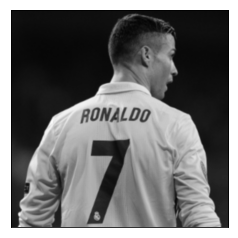

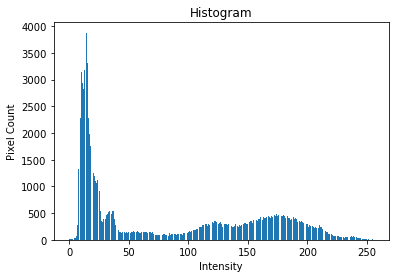

In [204]:
display_image(source)
hist_plot(source)

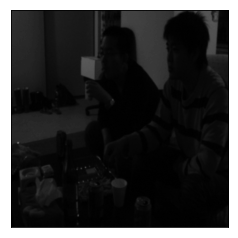

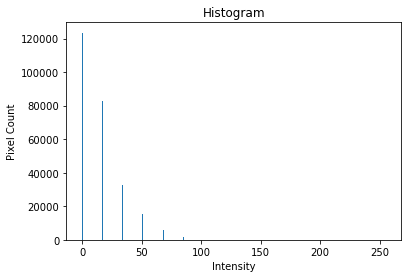

In [205]:
display_image(template)
hist_plot(template)

## PDF and CDF PLOTS

### Image 1

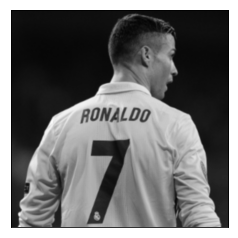

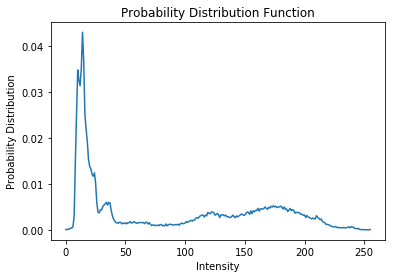

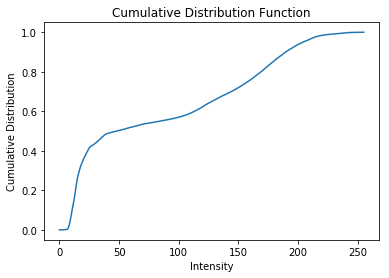

In [206]:
display_image(source)
pdf_plot(source)
cdf_plot(source)

### Image 2

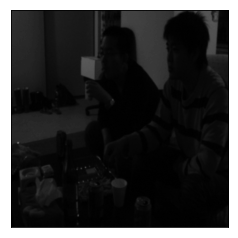

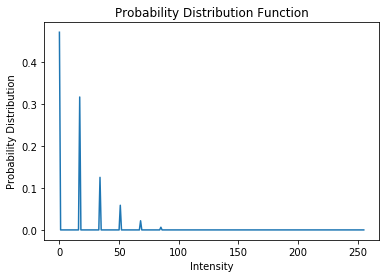

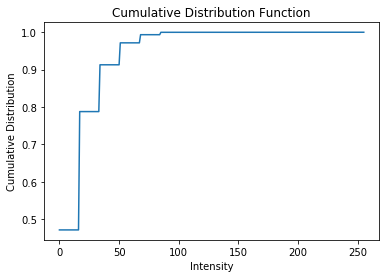

In [207]:
display_image(template)
pdf_plot(template)
cdf_plot(template)

## HISTOGRAM EQUALIZATION

### Histogram Equalization For Image 1

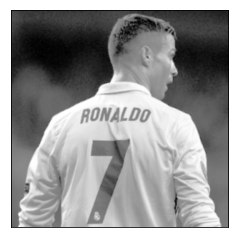

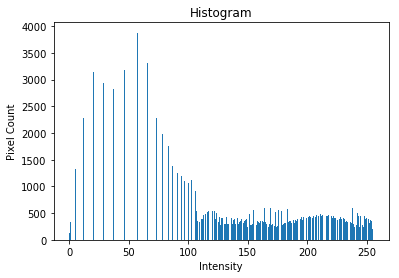

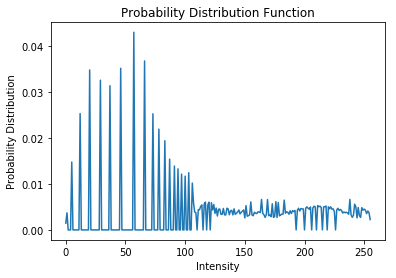

In [214]:
hist_equalization(source)


### Histogram Equalization For Image 2

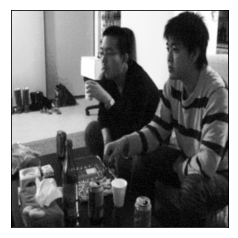

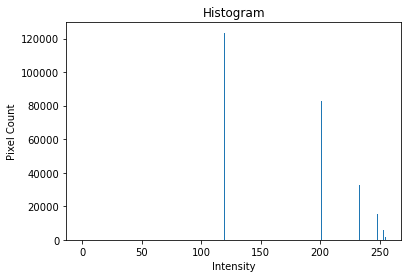

In [209]:
hist_equalization(template)

## HISTOGRAM MATCHING

### Input the Source and the Template Image

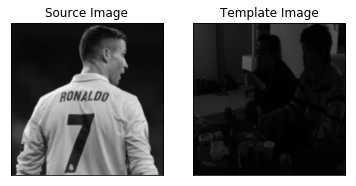

In [210]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(source, cmap = 'gray', interpolation = 'bicubic')
plt.title('Source Image')
plt.xticks([]),plt.yticks([])
f.add_subplot(1,2,2)
plt.imshow(template, cmap = 'gray', interpolation = 'bicubic')
plt.title('Template Image')
plt.xticks([]),plt.yticks([])
plt.show()



### Image After matching Source with Template

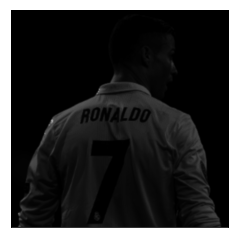

In [211]:
matched_image = hist_match(source,template)
display_image(matched_image)


### Histogram of Image after matching

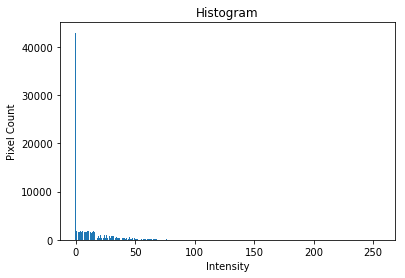

In [212]:
hist_plot(matched_image)